In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('crime.csv')
df.head()

,Unnamed: 0,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle
0,ME,2.0,14.8,28,102,803,2347,164
1,NH,2.2,21.5,24,92,755,2208,228
2,VT,2.0,21.8,22,103,949,2697,181
3,MA,3.6,29.7,193,331,1071,2189,906
4,RI,3.5,21.4,119,192,1294,2568,705


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  51 non-null     object 
 1   Murder      51 non-null     float64
 2   Rape        51 non-null     float64
 3   Robbery     51 non-null     int64  
 4   Assault     51 non-null     int64  
 5   Burglary    51 non-null     int64  
 6   Theft       51 non-null     int64  
 7   Vehicle     51 non-null     int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 3.3+ KB


Berdasarkan informasi data yang ditampilkan diatas, terlihat jika tipe data masing-masing feature sudah benar semua, tidak ada yang salah. sehingga tidak memerlukan perubahan tipe data. Juga bisa dilihat bahwa dataset ini terdiri dari 51 baris dan 8 kolom. Missing value juga tidak ditemukan dalam dataset ini

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,51.0,7.250980,4.816861,1.0,3.80,6.6,9.70,31.0
Rape,51.0,34.217647,14.570940,11.6,23.45,30.5,43.75,72.7
Robbery,51.0,154.098039,137.816437,7.0,69.00,112.0,207.00,754.0
Assault,51.0,283.352941,148.338508,32.0,177.00,252.0,385.50,668.0
Burglary,51.0,1207.078431,421.797148,385.0,901.00,1159.0,1457.00,2221.0
Theft,51.0,2941.960784,763.421796,1358.0,2385.00,2822.0,3400.50,4373.0
Vehicle,51.0,393.843137,223.623288,99.0,211.50,328.0,544.50,975.0


berdasarkan data descriptive diatas, rata-rata index rate kasus "Murder" di AS adalah 7.2
sedangkan rata-rata index rate untuk kasus "Rape" di AS adalah 34.2

berdasarkan sumber berikut ini https://www.numbeo.com/crime/rankings_by_country.jsp AS menempati posisi ke 87 berdasarkan crime index nya

In [5]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Rape          0
Robbery       0
Assault       0
Burglary      0
Theft         0
Vehicle       0
dtype: int64

Dipastikan bahwa tidak ada missing value pada dataset diatas

In [6]:
df.rename(columns={'Unnamed: 0':'State'},inplace=True)

Mengubah nama kolom unnamed menjadi State agar lebih mudah dipahami

In [7]:
# Check Variance

for i in df.columns[1:]:
    print(f'{i} {round(df[i].var(),2)}')

Murder 23.2
Rape 212.31
Robbery 18993.37
Assault 22004.31
Burglary 177912.83
Theft 582812.84
Vehicle 50007.37


dari nilai variance diatas, terlihat bahwa feature theft dan vehicle memiliki nilai variance yang paling besar dibanding feature lainnya

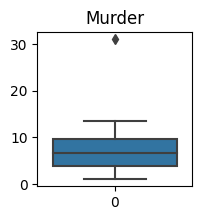

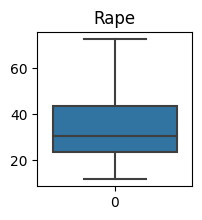

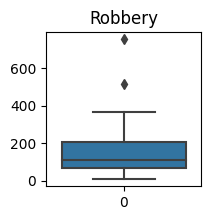

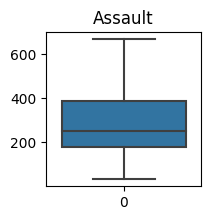

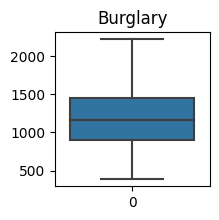

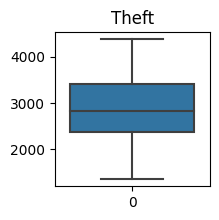

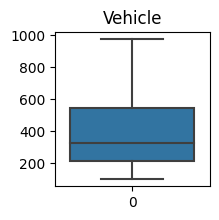

In [8]:
# Boxlplot

for i in df.columns[1:]:
    plt.figure(figsize=(2,2))
    sns.boxplot(df[i])
    plt.title(f'{i}')

untuk melihat ada tidaknya suatu outlier dalam data, dapat menggunakan grafik boxplot. dari grafik diatas, terlihat ada 2 feature yang memiliki outlier, yaitu feature murder dan robbery

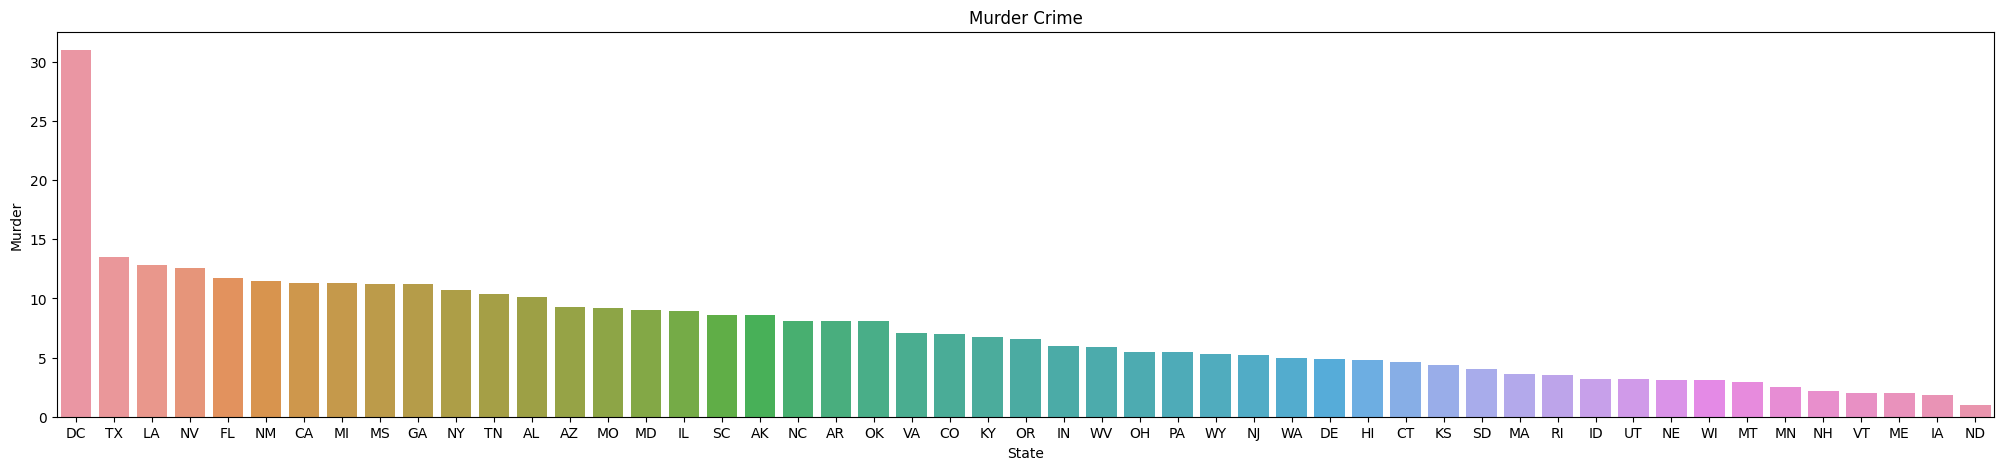

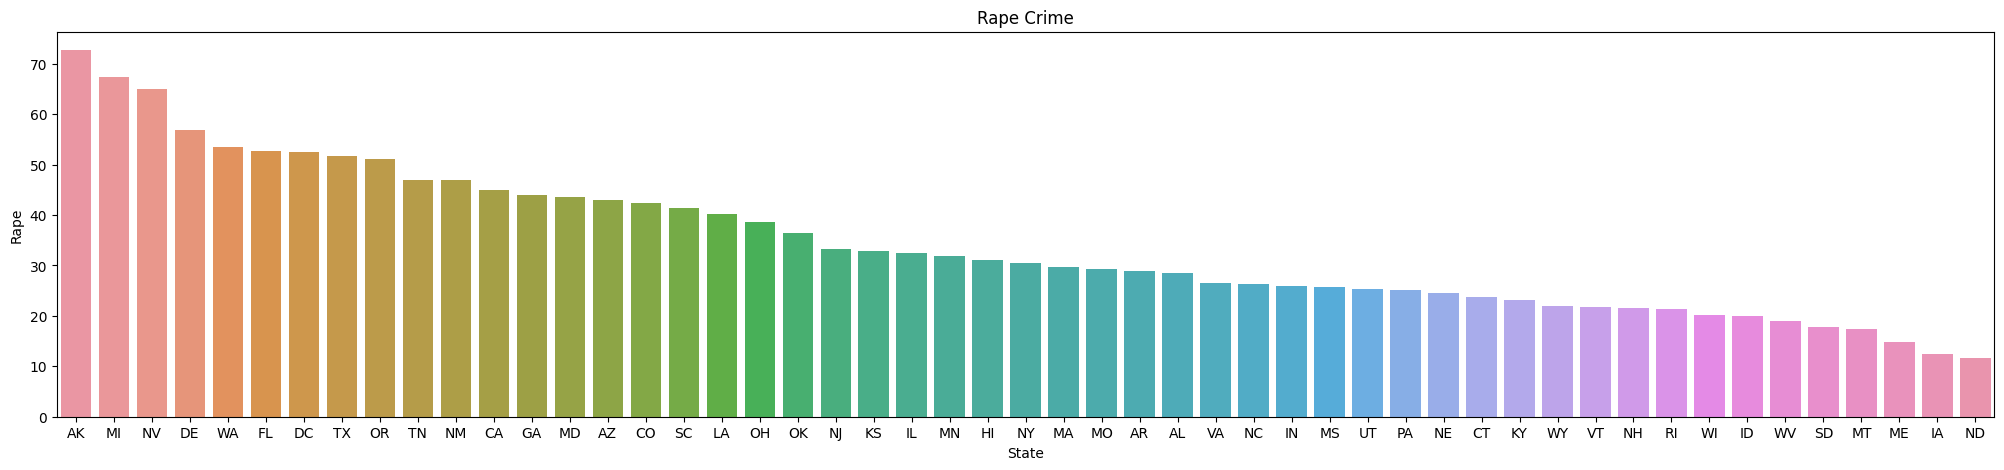

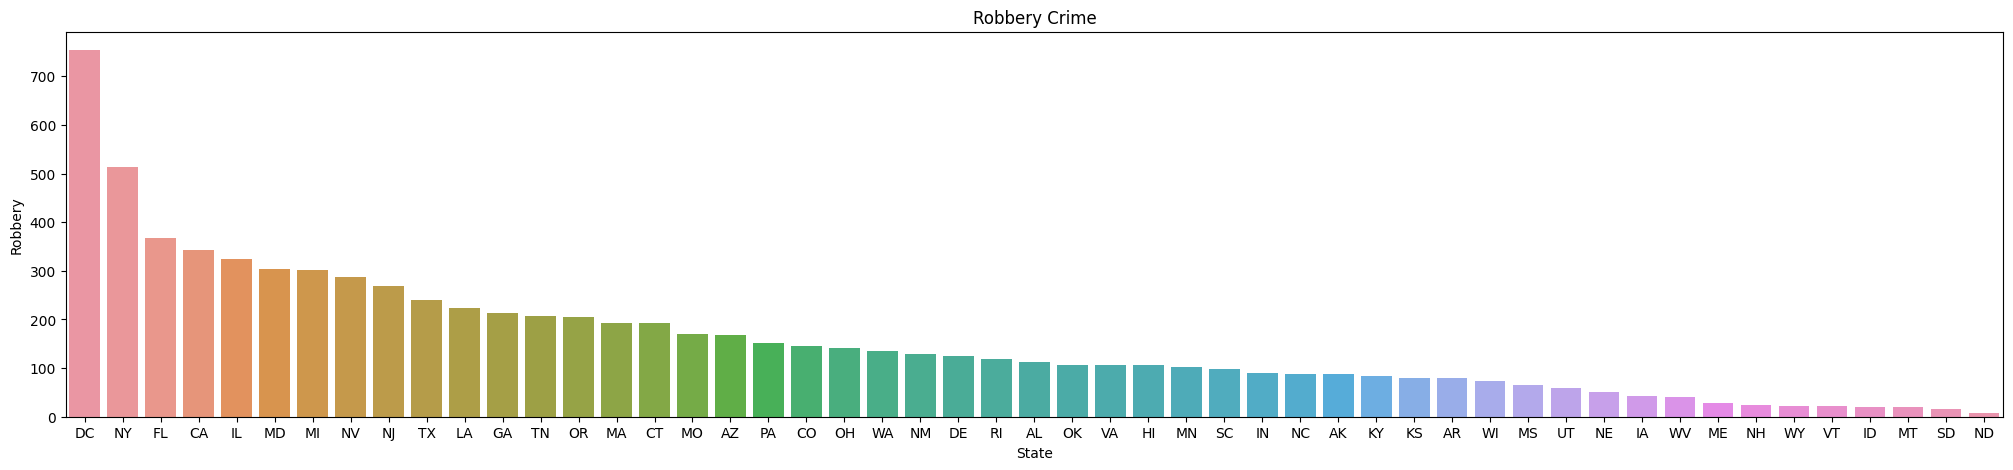

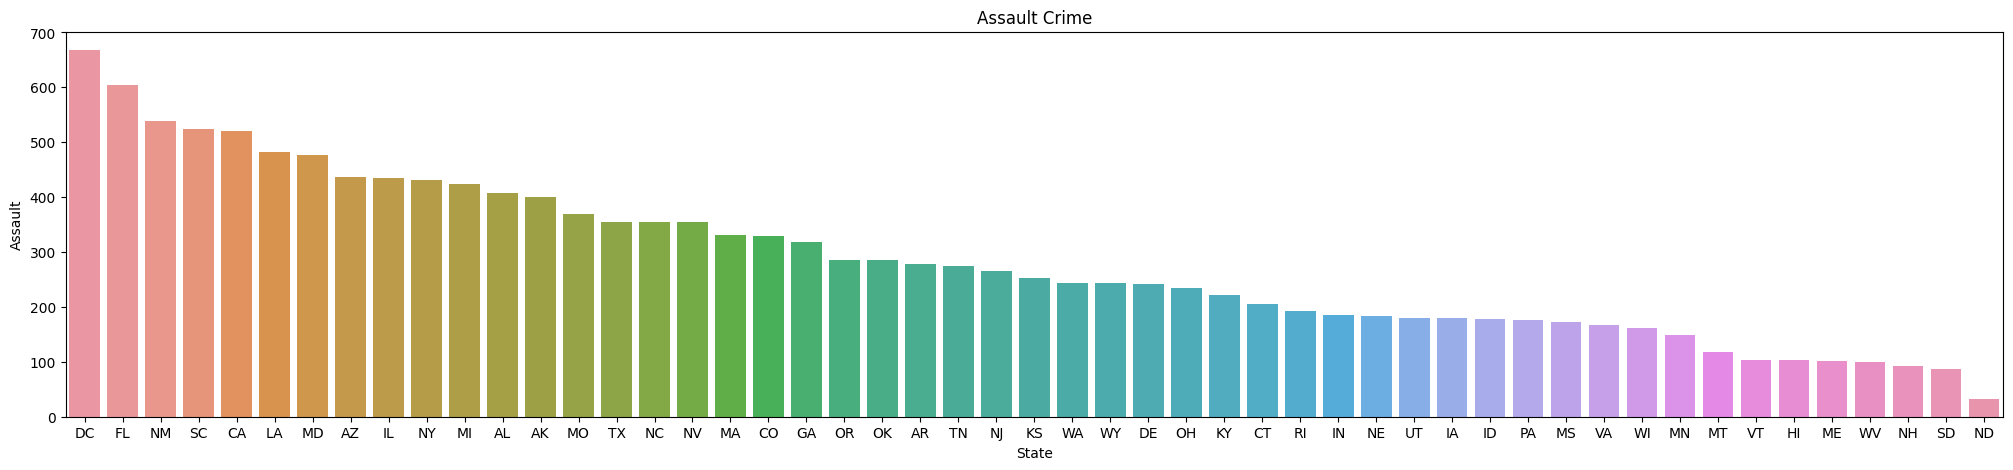

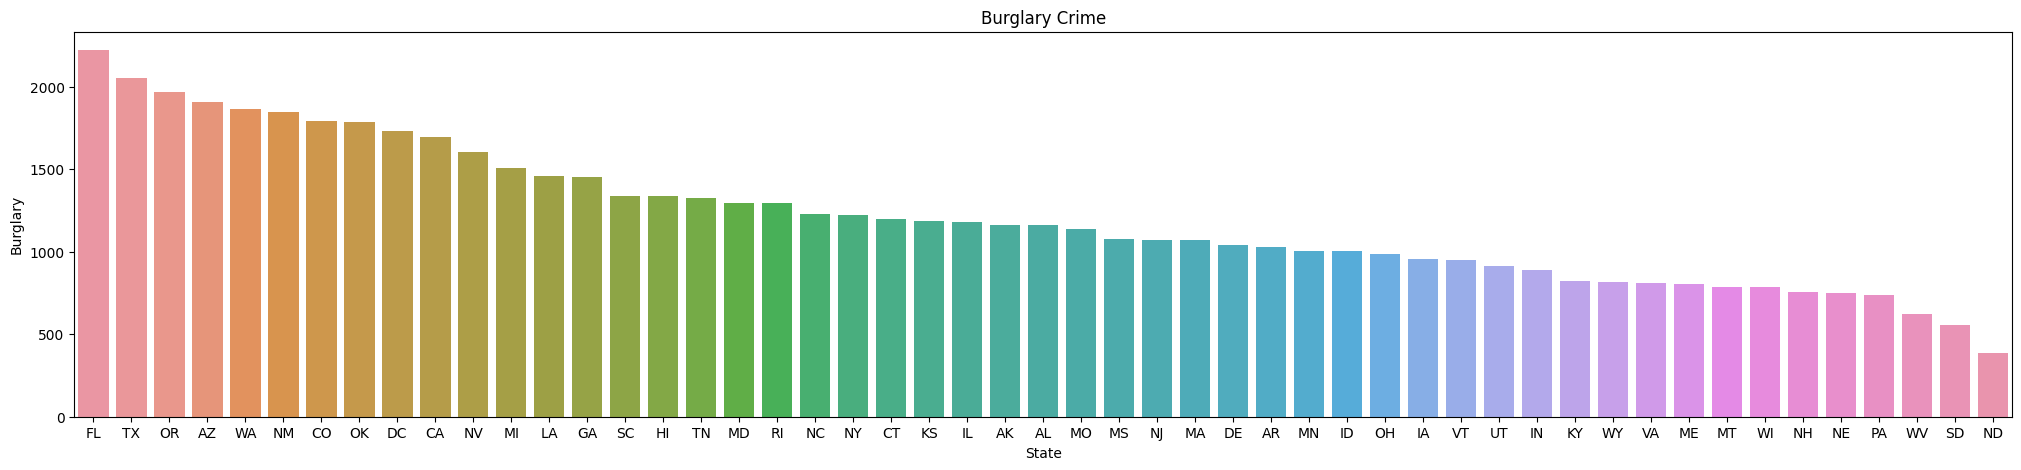

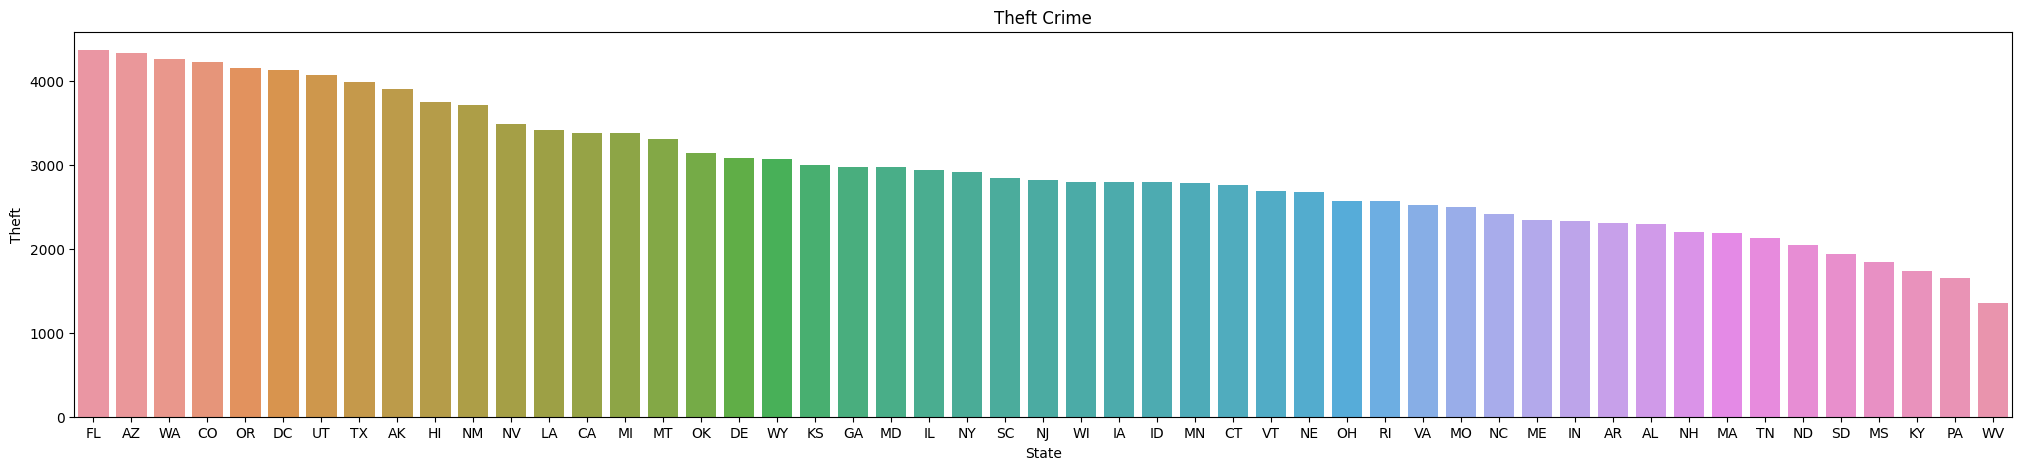

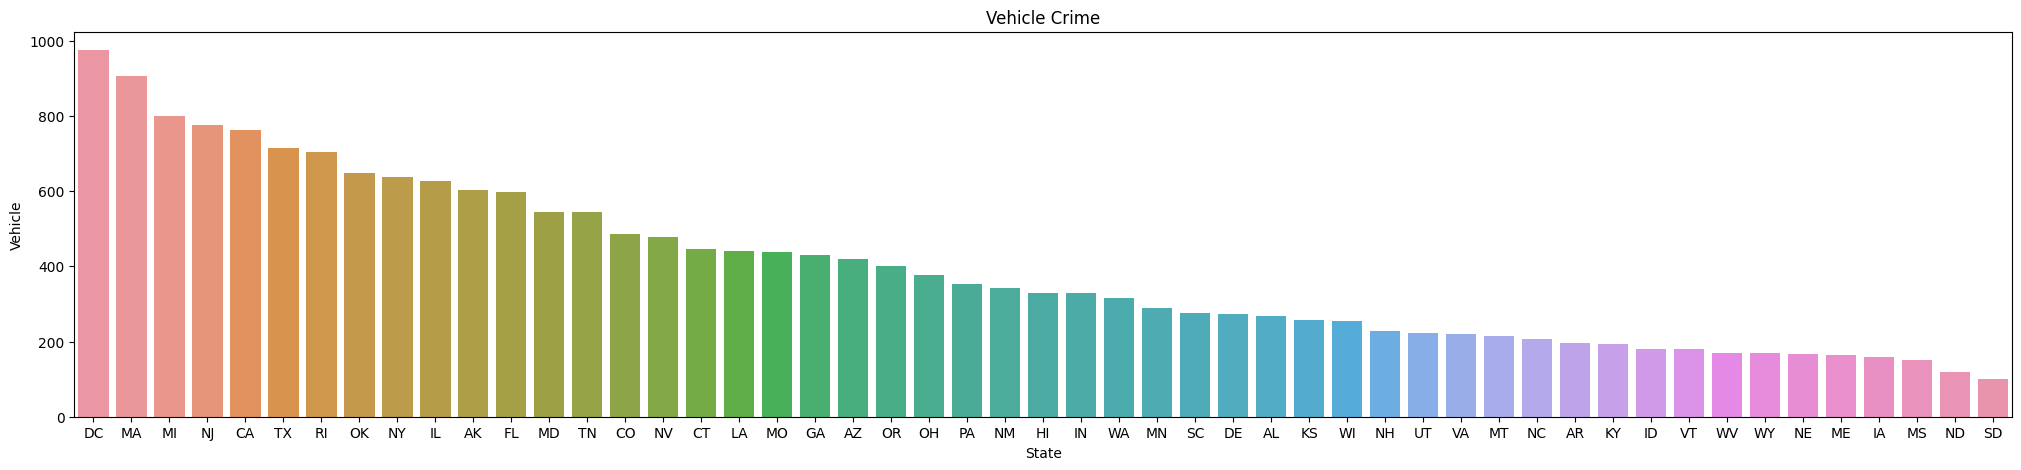

In [11]:
for i in df.columns[1:]:
    a = df[['State',i]].sort_values(i,ascending=False)
    plt.figure(figsize=(25,5))
    sns.barplot(x=a['State'],y=a[i])
    plt.title(f'{i} Crime')

Untuk jenis kejahatan seperti pembunuhan, perampokan, penyerangan dan kejahatan dengan kendaraan, Washington DC memiliki crime index rate dan jumlah kasus yang paling tinggi . Untuk jenis kejahatan pemerkosaan, Alaska memiliki crime index rate tertinggi . Sedangkan untuk jenis kejahatan penyusupan dan pencurian, Florida memiliki jumlah kasus paling tinggi 

*Perbedaan robbery, theft, burglary https://www.sentencingcouncil.org.uk/blog/post/what-is-the-difference-between-theft-robbery-and-burglary/#:~:text=Put%20very%20simply%2C%20someone%20is,to%20steal%20property%20from%20it.*

In [12]:
df['Total Case'] = df.iloc[:,3:].sum(axis=1)
df

,State,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle,Total Case
0,ME,2.0,14.8,28,102,803,2347,164,3444
1,NH,2.2,21.5,24,92,755,2208,228,3307
2,VT,2.0,21.8,22,103,949,2697,181,3952
3,MA,3.6,29.7,193,331,1071,2189,906,4690
4,RI,3.5,21.4,119,192,1294,2568,705,4878
5,CT,4.6,23.8,192,205,1198,2758,447,4800
6,NY,10.7,30.5,514,431,1221,2924,637,5727
7,NJ,5.2,33.2,269,265,1071,2822,776,5203
8,PA,5.5,25.1,152,176,735,1654,354,3071
9,OH,5.5,38.6,142,235,988,2574,376,4315


<AxesSubplot: xlabel='State', ylabel='Total Case'>

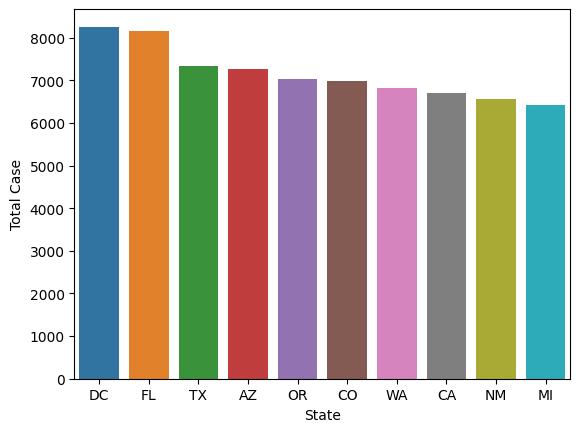

In [13]:
tot_case = df[['State','Total Case']].sort_values('Total Case',ascending=False).head(10)
sns.barplot(x=tot_case['State'],y=tot_case['Total Case'])

Negara bagian dengan total kasus kriminal terbesar adalah washington DC, Florida, dan Texas

<AxesSubplot: xlabel='State', ylabel='Total Case'>

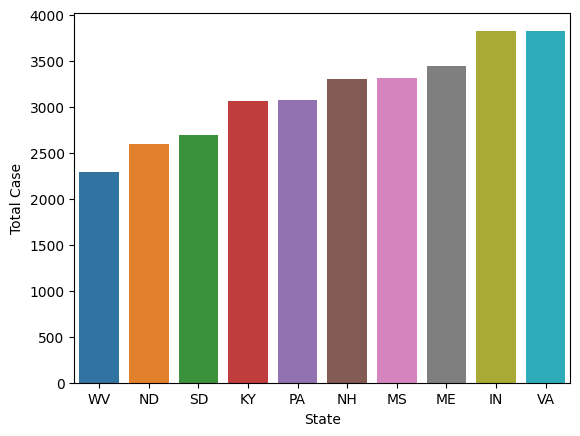

In [14]:
tot_case = df[['State','Total Case']].sort_values('Total Case',ascending=True).head(10)
sns.barplot(x=tot_case['State'],y=tot_case['Total Case'])

Negara bagian dengan total kasus kriminal paling rendah (paling aman) adalah West Virgina, North Dakota, South Dakota

In [80]:
# find quartile in every feature

def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'Q1: {q1}')
    print(f'Q3: {q3}')
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'lower_whisker: {limit_bawah}')
    print(f'upper_whisker: {limit_atas}') 
    print(f'Mean : {data.mean()}')
    print(f'std : {data.std()}')

In [16]:
num_col = [col for col in df.columns if df[col].dtype != object]

for i in df[num_col]:
  print('Feature :', i)
  find_anomalies(df[i])
  print('\n')

Feature : Murder
Q1: 3.8
Q3: 9.7
IQR: 5.8999999999999995
lower_whisker: -5.05
upper_whisker: 18.549999999999997
Mean : 7.2509803921568645
std : 4.816860909306791


Feature : Rape
Q1: 23.450000000000003
Q3: 43.75
IQR: 20.299999999999997
lower_whisker: -6.999999999999993
upper_whisker: 74.19999999999999
Mean : 34.21764705882353
std : 14.570939652367695


Feature : Robbery
Q1: 69.0
Q3: 207.0
IQR: 138.0
lower_whisker: -138.0
upper_whisker: 414.0
Mean : 154.09803921568627
std : 137.81643659621457


Feature : Assault
Q1: 177.0
Q3: 385.5
IQR: 208.5
lower_whisker: -135.75
upper_whisker: 698.25
Mean : 283.3529411764706
std : 148.33850795116038


Feature : Burglary
Q1: 901.0
Q3: 1457.0
IQR: 556.0
lower_whisker: 67.0
upper_whisker: 2291.0
Mean : 1207.078431372549
std : 421.79714760236374


Feature : Theft
Q1: 2385.0
Q3: 3400.5
IQR: 1015.5
lower_whisker: 861.75
upper_whisker: 4923.75
Mean : 2941.9607843137255
std : 763.4217958844066


Feature : Vehicle
Q1: 211.5
Q3: 544.5
IQR: 333.0
lower_whisker:

<AxesSubplot: >

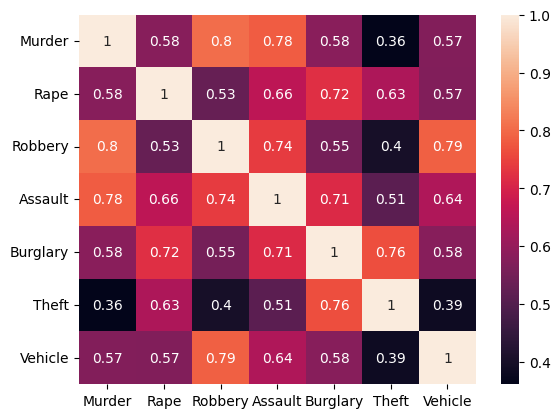

In [81]:
# Correlation Map
sns.heatmap(df.iloc[:,1:8].corr(),annot=True)

Jika dilihat berdasarkan correlation map, terlihat bahwa kasus pembunuhan memiliki korelasi paling tinggi terhadap kasus penyerangan. Sedangkan kasus pemerkosaan, memiliki korelasi yang paling tinggi terhadap kasus penyusupan

In [19]:
df[['Murder','Assault']].corr()

,Murder,Assault
Murder,1.000000,0.781225
Assault,0.781225,1.000000


<AxesSubplot: xlabel='Murder', ylabel='Assault'>

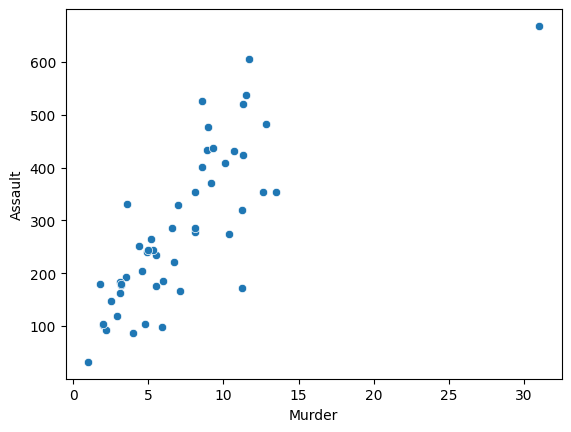

In [20]:
sns.scatterplot(x=df['Murder'],y=df['Assault'])

In [21]:
df[df['Murder']>30]

,State,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle,Total Case
23,DC,31.0,52.4,754,668,1728,4131,975,8256


In [22]:
df[['Rape', 'Burglary']].corr()

,Rape,Burglary
Rape,1.000000,0.721333
Burglary,0.721333,1.000000


<AxesSubplot: xlabel='Rape', ylabel='Burglary'>

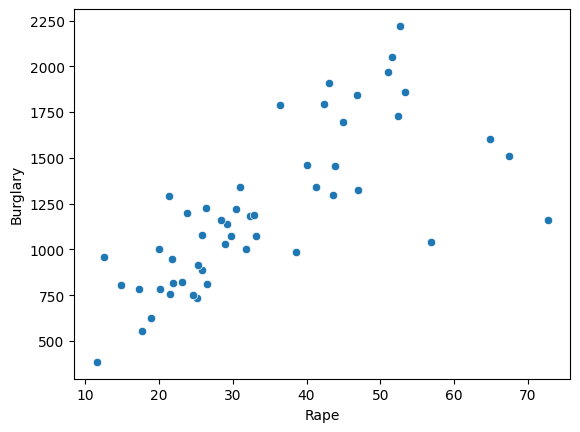

In [23]:
sns.scatterplot(x=df['Rape'],y=df['Burglary'])

In [24]:
df[df['Rape']>50]

,State,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle,Total Case
12,MI,11.3,67.4,301,424,1509,3378,800,6412
21,DE,4.9,56.9,124,241,1042,3090,272,4769
23,DC,31.0,52.4,754,668,1728,4131,975,8256
29,FL,11.7,52.7,367,605,2221,4373,598,8164
37,TX,13.5,51.6,240,354,2049,3987,714,7344
45,NV,12.6,64.9,287,354,1604,3489,478,6212
46,WA,5.0,53.4,135,244,1861,4267,315,6822
47,OR,6.6,51.1,206,286,1967,4163,402,7024
49,AK,8.6,72.7,88,401,1162,3910,604,6165


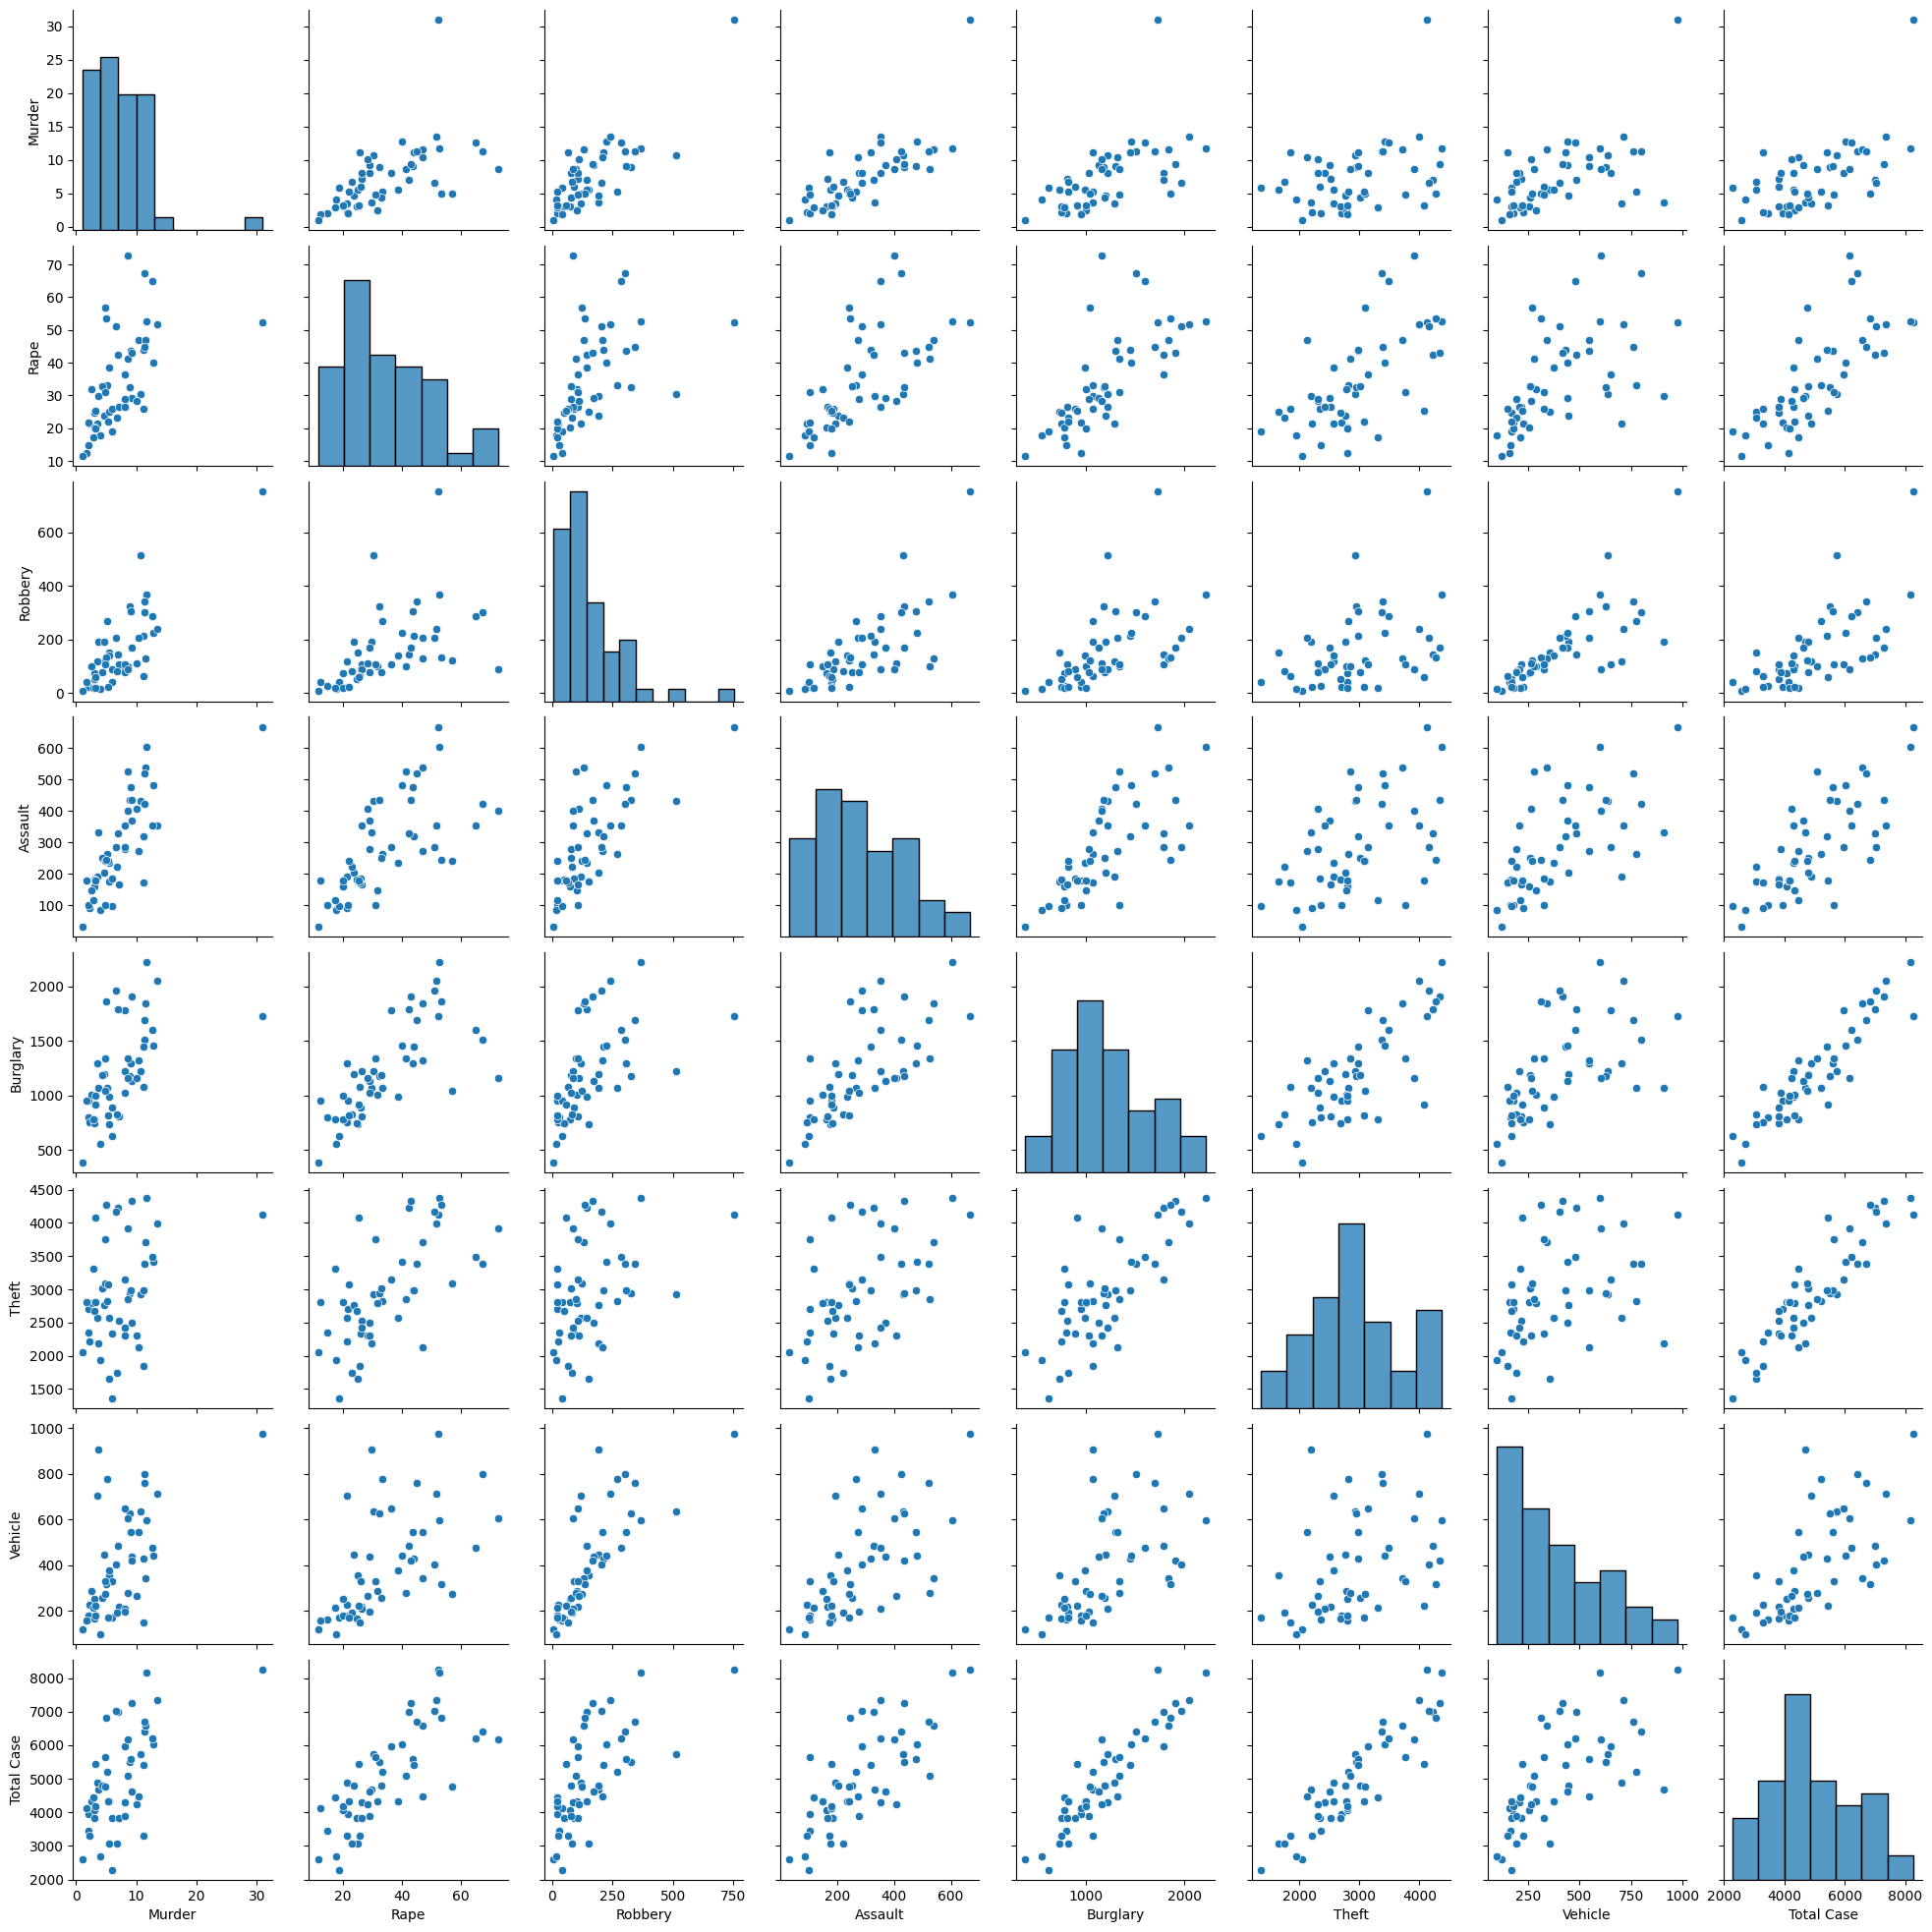

In [25]:
sns.pairplot(df)

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

In [27]:
scaler = StandardScaler()

In [28]:
df2 = df.copy()
df2.set_index('State',inplace=True)

In [29]:
df2_scaled = scaler.fit_transform(df2)

In [30]:
df2_scaled.shape

(51, 8)

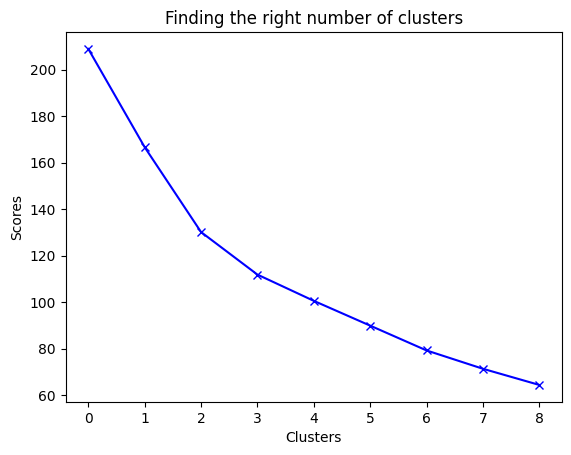

In [31]:
from sklearn.cluster import KMeans

scores_1 = []

range_values = range(2, 11)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df2_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

Berdasarkan metode elbow method, nilai K optimal adalah K = 2

In [32]:
# Find Optimal Number of Cluster Using Silhouette Score

kmeans = KMeans(n_clusters=2)
kmeans.fit(df2_scaled)

KMeans(n_clusters=2)

In [33]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1])

In [34]:
from sklearn.metrics import silhouette_score

label = kmeans.labels_
silhouette_score(df2_scaled,label,metric='euclidean')

0.41244496557148314

In [35]:
score = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2_scaled)
    label = kmeans.labels_
    score.append(silhouette_score(df2_scaled,label,metric='euclidean'))


Text(0, 0.5, 'Silhouette Score')

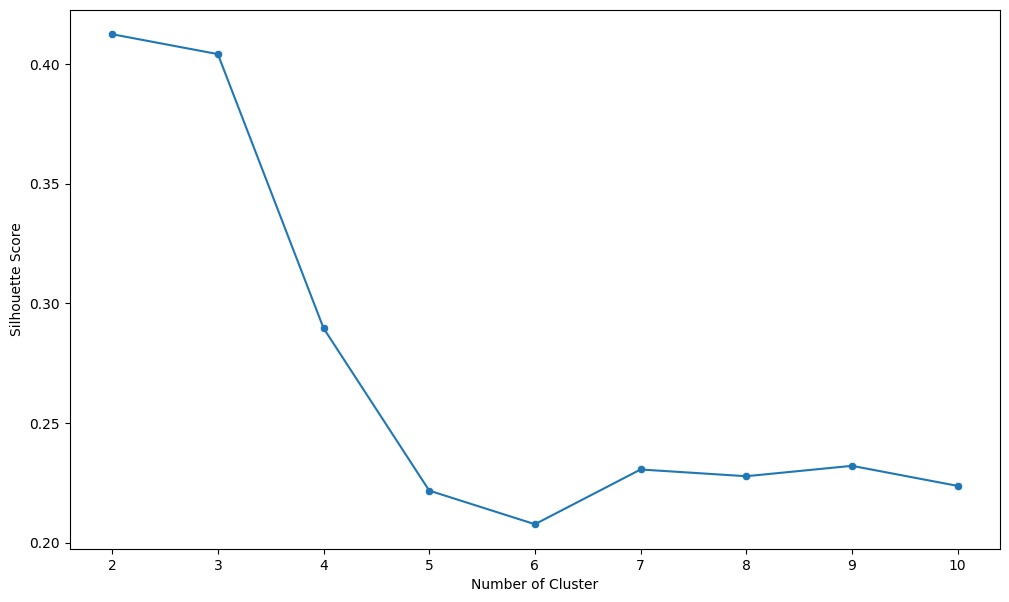

In [36]:
plt.figure(figsize=(12,7))

sns.lineplot(x= number_of_cluster,y = score)
sns.scatterplot(x = number_of_cluster, y = score)

plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')

Berdasarkan Sillhoutte Score nilai K optimal adalah K = 2, karena memiliki score yang paling tinggi

Karena berdasarkan elbow method dan silhouette score nilai K optimum adalah 2, maka untuk Kmeans akan digunakan n_cluster = 2

In [38]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df2_scaled)
labels = kmeans.labels_

In [39]:
kmeans.cluster_centers_

array([[-0.50341319, -0.63104414, -0.53567922, -0.61311802, -0.64867075,
        -0.51849099, -0.53492508, -0.66476958],
       [ 0.7191617 ,  0.90149163,  0.76525602,  0.87588289,  0.92667249,
         0.74070141,  0.76417868,  0.94967083]])

In [40]:
kmeans.cluster_centers_.shape

(2, 8)

In [44]:
# cluster centers return the value of the center centroid

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df2.columns])
cluster_centers           

,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle,Total Case
0,-0.503413,-0.631044,-0.535679,-0.613118,-0.648671,-0.518491,-0.534925,-0.664770
1,0.719162,0.901492,0.765256,0.875883,0.926672,0.740701,0.764179,0.949671


In [45]:
# In order to understand what these numbers mean, let's perform inverse transformation

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df2.columns])
cluster_centers

,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle,Total Case
0,4.850000,25.113333,81.00000,193.3,936.166667,2550.033333,275.400000,4035.90000
1,10.680952,47.223810,258.52381,412.0,1594.095238,3501.857143,563.047619,6329.52381


In [83]:
# apply cluster to every row in dataset

df_cluster = pd.concat([df, pd.DataFrame({'Cluster':labels})], axis = 1)
df_cluster

,State,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle,Total Case,Cluster
0,ME,2.0,14.8,28,102,803,2347,164,3444,0
1,NH,2.2,21.5,24,92,755,2208,228,3307,0
2,VT,2.0,21.8,22,103,949,2697,181,3952,0
3,MA,3.6,29.7,193,331,1071,2189,906,4690,0
4,RI,3.5,21.4,119,192,1294,2568,705,4878,0
5,CT,4.6,23.8,192,205,1198,2758,447,4800,0
6,NY,10.7,30.5,514,431,1221,2924,637,5727,1
7,NJ,5.2,33.2,269,265,1071,2822,776,5203,1
8,PA,5.5,25.1,152,176,735,1654,354,3071,0
9,OH,5.5,38.6,142,235,988,2574,376,4315,0


In [71]:
df_cluster[df_cluster['Cluster']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,30.0,4.850000,2.576786,1.0,3.100,4.50,5.975,11.2
Rape,30.0,25.113333,8.525853,11.6,20.425,24.85,28.775,56.9
Robbery,30.0,81.000000,53.335632,7.0,31.250,80.00,110.500,193.0
Assault,30.0,193.300000,89.479009,32.0,125.500,179.50,239.500,408.0
Burglary,30.0,936.166667,222.073937,385.0,788.000,952.50,1074.750,1339.0
Theft,30.0,2550.033333,585.776731,1358.0,2232.000,2545.00,2800.750,4074.0
Vehicle,30.0,275.400000,170.198586,99.0,172.000,221.00,318.000,906.0
Total Case,30.0,4035.900000,802.074825,2292.0,3539.000,4159.50,4573.750,5635.0
Cluster,30.0,0.000000,0.000000,0.0,0.000,0.00,0.000,0.0


In [72]:
df_cluster[df_cluster['Cluster']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,21.0,10.680952,5.232363,5.0,8.6,10.4,11.5,31.0
Rape,21.0,47.223810,11.109856,30.5,41.3,44.9,52.4,72.7
Robbery,21.0,258.523810,154.575748,88.0,145.0,224.0,304.0,754.0
Assault,21.0,412.000000,117.726378,244.0,319.0,424.0,482.0,668.0
Burglary,21.0,1594.095238,325.440917,1071.0,1325.0,1604.0,1845.0,2221.0
Theft,21.0,3501.857143,632.391041,2126.0,2978.0,3417.0,4131.0,4373.0
Vehicle,21.0,563.047619,178.635516,277.0,430.0,545.0,649.0,975.0
Total Case,21.0,6329.523810,982.220017,4477.0,5599.0,6212.0,6983.0,8256.0
Cluster,21.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


Pembagian cluster menjadi 2 dibedakan berdasarkan jumlah kasus kriminal nya. 

In [56]:
from sklearn.decomposition import PCA

# made 30 components
pca = PCA(n_components = 8)
pca.fit(df2_scaled)

# transform the data
X_pca = pca.transform(df2_scaled)

In [57]:
variance = []

for i in range(0,8):
  variance.append(np.var(X_pca[:,i]))

In [58]:
variance

[5.565234966287348,
 1.085216193119035,
 0.4713461198229389,
 0.3659604521124377,
 0.2390568859721305,
 0.1787989713493144,
 0.0943864113368011,
 3.223362335192406e-32]

In [75]:
# % number of information extracted if using 2 component

print('information extracted {} %'.format(np.sum(variance[:2])*100/np.sum(variance)))

information extracted 83.13063949257973 %


In [60]:
# Obtain the principal components 
# only keep two component
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df2_scaled)
principal_comp

array([[-3.00110242, -0.13988272],
       [-2.9056345 ,  0.02316776],
       [-2.39986292, -0.68237588],
       [ 0.09785652,  1.35487795],
       [-0.5362377 ,  0.27501549],
       [-0.59484662,  0.17695577],
       [ 2.02085397,  1.88603984],
       [ 0.53853769,  0.8560463 ],
       [-2.17764935,  1.4306158 ],
       [-0.73464482,  0.23221973],
       [-1.66204184,  0.47669252],
       [ 1.35879472,  1.15055351],
       [ 3.27347214,  0.34173091],
       [-2.0455015 , -0.21435898],
       [-1.45562614, -0.47343704],
       [-2.32770489, -0.57559869],
       [-0.009078  ,  0.90208955],
       [-4.18193435,  0.27674524],
       [-3.56032094,  0.47222929],
       [-2.21920427, -0.26399147],
       [-0.74701714, -0.6908954 ],
       [-0.13003597, -0.74597667],
       [ 1.7104864 ,  0.76634858],
       [ 7.3618914 ,  3.13207575],
       [-1.72563948,  0.34907655],
       [-3.49328112,  1.27617679],
       [-0.78988477,  0.29582558],
       [ 0.66781893, -0.04311132],
       [ 1.16281929,

In [62]:
print("Original shape: {}".format(str(df2_scaled.shape)))
print("Reduced shape: {}".format(str(principal_comp.shape)))

Original shape: (51, 8)
Reduced shape: (51, 2)


In [63]:
# Create a dataframe with the two components

pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-3.001102,-0.139883
1,-2.905634,0.023168
2,-2.399863,-0.682376
3,0.097857,1.354878
4,-0.536238,0.275015


In [64]:
# Concatenate the clusters labels to the dataframe

pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-3.001102,-0.139883,0
1,-2.905634,0.023168,0
2,-2.399863,-0.682376,0
3,0.097857,1.354878,0
4,-0.536238,0.275015,0


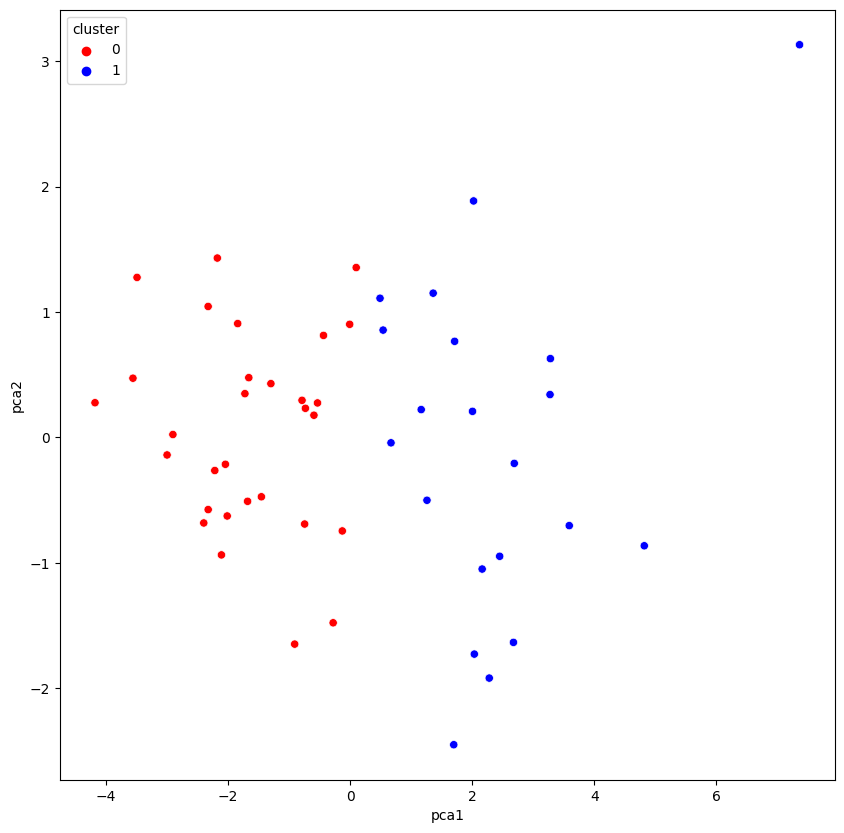

In [66]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','blue'])
plt.show()